Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and remove every line containing the expression: "raise ..." (if you leave such a line your code will not run).

Do not remove any cell from the notebook you downloaded. You can add any number of cells (and remove them if not more necessary).

Do not leave any variable initialized to None.

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!!!

## Make sure to name your notebook file (.ipynb) correctly:
### - UL_NAMESURNAME_ID (E.g. : UL_MARIOROSSI_2204567)

## Fill in your name, surname and id number (numero matricola) below:

In [1]:
NAME = "Mehmet Can Eroglu"
ID_number = int("2106036")

import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

# Classification on Wine Dataset

### Dataset description

We will be working with a dataset on wines from the UCI machine learning repository
(http://archive.ics.uci.edu/ml/datasets/Wine ). It contains data for 178 instances. 
The dataset is the results of a chemical analysis of wines grown in the same region
in Italy but derived from three different cultivars. The analysis determined the
quantities of 13 constituents found in each of the three types of wines. 

### The features in the dataset are:

- Alcohol
- Malic acid
- Ash
- Alcalinity of ash
- Magnesium
- Total phenols
- Flavanoids
- Nonflavanoid phenols
- Proanthocyanins
- Color intensity
- Hue
- OD280/OD315 of diluted wines
-Proline




We first import all the packages that are needed

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


import numpy as np
import scipy as sp
from scipy import stats
from sklearn import datasets
from sklearn import linear_model
import copy

In [3]:
np.random.seed(ID_number)

# Perceptron
We will implement the perceptron and use it to learn a halfspace with 0-1 loss.

Load the dataset from scikit learn and then split in training set and test set (50%-50%) after applying a random permutation to the dataset.

In [4]:
# Load the dataset from scikit learn
wine = datasets.load_wine()
# Get input and output data from the dataset
X = wine.data
Y = wine.target
print(Y,"\n")

# Create new labels
Y = np.where(Y == 0, -1, Y)
Y = np.where(Y == 2, -1, Y)
print(Y)

# Let's get the number of features
d = X.shape[1]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [5]:
##### Helper functions, do not modify them. You will need them for the first TODO
def check_constraints(labels, all_possibile_labels, min_num_istances):
    # Count the number of occurrences using numpy
    unique, counts = np.unique(labels, return_counts=True)
    if len(all_possibile_labels) != len(unique):
        return True  #there are not all the labels
    if (counts >= min_num_istances).all():
        return False #there are enough istances of each label
    else:
        return True  #there are not enough istances of each label
    
def need_new_shuffle(y_train, y_test, all_possibile_labels, min_num_istances):    #understands if the training and test are ok  
    return (check_constraints(y_train, all_possibile_labels, min_num_istances) or #train set not ok 
            check_constraints(y_test, all_possibile_labels, min_num_istances))    #test set not ok

In [6]:
# TODO 1
# Write a function (create_train_val_test_datasets) which takes as input a dataset and returns 2 datasets: 
# S_t and S_test (different runs are supposed) to return different datasets.
# Write a function (create_train_val_test_datasets_with_constraints) which splits our data in S_t and S_test with 
# the additional constraint that in each dataset we MUST have more than min_num_istances per class.
# Each dataset is represented as a matrix m \times d (numpy ndarray), where m is the number of data and d is the 
# number of features.
# To solve this TODO use the functions we provide you: check_constraints and need_new_shuffle

def create_train_val_test_datasets(features : np.ndarray, labels: np.ndarray, m_t : int, m_test : int):
    '''
    Create training (S_t) and test (S_test) sets starting from a dataset. 
    This function shuffles the complete dataset before creating the subsets. 
    If you call this function twice it is expected to get different S_t, S_test. 
    
    :param features: NumPy ndarray containing all the input data data we can use
    :param labels: NumPy ndarray containing all the labels we have
    :param m_t: Number of samples for the training dataset
    :param m_test: Number of samples for the test dataset
    
    :returns: (x_train, y_train, x_test, y_test)
    :rtype: tuple
        WHERE
        x_train : np.ndarray features in the training dataset
        y_train : np.ndarray labels in the training dataset
        x_test : np.ndarray features in the test dataset
        y_test : np.ndarray labels in the test dataset
    '''
    # SUGGESTION: Use the function np.random.permutation (see the documentation) to create a permutation of the 
    #             dataset indexes. Then use these shuffled indexes to create S_t, S_val, S_test
        
    shuffled_ind = np.random.permutation(len(labels))
    train_ind = shuffled_ind[:m_t]
    test_ind = shuffled_ind[m_t:m_t+m_test]
    
    x_train, x_test = features[train_ind,:], features[test_ind,:]
    y_train, y_test = labels[train_ind], labels[test_ind]
    
    return x_train, y_train, x_test, y_test



def create_train_val_test_datasets_with_constraints(features : np.ndarray, labels: np.ndarray, m_t : int, 
                                                    m_test : int, min_num_istances : int):
    '''
    Same as function above but now we are imposing the constraints: the splitted datasets are assumed to contain 
    at least min_num_istances per class.
    
    ...
    :param min_num_istances: Minimum number of istances per class in each of the splitted datasets
    ...
    
    '''
    all_possibile_labels = np.unique(labels)
        
    x_train, y_train, x_test, y_test = create_train_val_test_datasets(features, labels, m_t, m_test)
    
    while need_new_shuffle(y_train, y_test, all_possibile_labels, min_num_istances) == True:
        x_train, y_train, x_test, y_test = create_train_val_test_datasets(features, labels, m_t, m_test)
    
    return x_train, y_train, x_test, y_test

m_t = 80
x_train, y_train, x_test, y_test = create_train_val_test_datasets_with_constraints(X, Y, m_t, len(Y)-m_t, 25)

In [7]:
assert x_train.shape == (m_t, x_train.shape[1]) # here we are comparing two tuples (it is an element wise comparison)
assert x_test.shape  == (len(Y)-m_t, x_test.shape[1])

In [8]:
# Let's add a 1 in front of each sample so that we can use a vector to describe all the coefficients of the model.
# Do not run this cell multiple times otherwise you will continue adding ones... 
# (we add the assert to avoid such issue)

assert x_train.shape[1] == d
assert x_test.shape[1] == d 

print(x_train, "\n")

x_train = np.hstack((np.ones((x_train.shape[0],1)), x_train))
x_test  = np.hstack((np.ones((x_test.shape[0],1)),  x_test))

print(x_train)


[[1.184e+01 2.890e+00 2.230e+00 ... 9.600e-01 2.520e+00 5.000e+02]
 [1.208e+01 1.330e+00 2.300e+00 ... 1.070e+00 3.210e+00 6.250e+02]
 [1.438e+01 1.870e+00 2.380e+00 ... 1.200e+00 3.000e+00 1.547e+03]
 ...
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]
 [1.356e+01 1.710e+00 2.310e+00 ... 9.500e-01 3.380e+00 7.950e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]] 

[[1.000e+00 1.184e+01 2.890e+00 ... 9.600e-01 2.520e+00 5.000e+02]
 [1.000e+00 1.208e+01 1.330e+00 ... 1.070e+00 3.210e+00 6.250e+02]
 [1.000e+00 1.438e+01 1.870e+00 ... 1.200e+00 3.000e+00 1.547e+03]
 ...
 [1.000e+00 1.413e+01 4.100e+00 ... 6.100e-01 1.600e+00 5.600e+02]
 [1.000e+00 1.356e+01 1.710e+00 ... 9.500e-01 3.380e+00 7.950e+02]
 [1.000e+00 1.317e+01 2.590e+00 ... 6.000e-01 1.620e+00 8.400e+02]]


**TO DO 2**

Now complete the function `perceptron`. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where 1 iteration corresponds to 1 update of the perceptron weights. If the perceptron returns because the maximum number of iterations has been reached, you should return an appropriate model (the best seen along the iterations). 

The input parameters to pass are:
- `X`: the matrix of input features, one row for each sample
- `Y`: the vector of labels for the input features matrix X
- `max_num_iterations`: the maximum number of iterations for running the perceptron

The output values are:
- `best_w`: the vector with the coefficients of the best model.
- `best_error`: the fraction of missclassified samples for the best model. (# missclassified/# possible errors)

- `w_iters`: a list of the coefficients found by the algorithm at each iteration. This is an 'auxiliary output' (it is not needed for the actual algorithm) that will allows us to have a better insight on the algorithm's behaviour.
- `error_iters`: a list containing the fraction of missclassified samples at each iteration. (Again an auxiliary output).

- `w_bestIters`: a list of the current best coefficients selected by the algorithm at each iteration (Again an auxiliary output) 
- `error_bestIters`: a list of the fraction of missclassified samples for current best model at each iteration. (Again an auxiliary output).

Note that `w_iters`, `error_iters`, `w_bestIters` and `error_bestIters` contain the history/evolution of the algorithm and must be of the same length.

---

**Auxiliary functions**

In order to correclty complete the perceptron function it is warmly recommended to define some auxiliary functions (`find_missclassified` and `choose_missclassified`). 

.


`find_missclassified`: This function looks for missclassified data points in the dataset `X`.

The input parameters to pass are:
- `X`: the matrix of input features, one row for each sample
- `Y`: the vector of labels for the input features matrix X
- `curr_w`: the current value of the parameter vector *w*

The output value is:
- `missclassified_indeces`: a numpy array cointaining all the missclassified indeces  

.


`choose_missclassified`: This function return one single index choosen from a array of indeces. If the array is empty it returns a non valid index: -1. 

The input parameters to pass are:
- `missclassified_indeces`: numpy array containing missclassified indeces

The output value is:
- `index`: Integer (or np.int64) containing the choosen index


In [9]:
# LEARNING HOW DOES np.argwhere() WORK?
m = np.arange(8).reshape([2,2,2])
a = np.argwhere(m%2==0)
print(a)
print(a.shape)
print(len(a))
print(a[3])

y_train == np.sign(np.dot(x_train, np.zeros(x_train.shape[1])))

[[0 0 0]
 [0 1 0]
 [1 0 0]
 [1 1 0]]
(4, 3)
4
[1 1 0]


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [10]:
# TODO 2

def find_missclassified(X,Y,curr_w):
    # Here you can use np.argwhere to find which model predictions are correct (this is faster than a for loop)
    # but be careful on the dimensions of your predictions vector and Y vector.
    
    #wrong_prediction = (Y != np.matmul(X, curr_w) > 0)
    #print(wrong_prediction)
    missclassified_indeces = np.argwhere(Y != np.sign(X @ curr_w))
    return missclassified_indeces



def choose_missclassified(missclassified_indeces):
    num_misclassified = len(missclassified_indeces)
    if num_misclassified == 0:
        return -1  # No misclassified points
    else:
        index = np.random.choice(np.arange(num_misclassified))
        index_missclassified = missclassified_indeces[index]

    return index_missclassified



def perceptron(X,Y,max_num_iterations):
    #INITIALIZATION
    curr_w = np.zeros(X.shape[1])
    best_w = curr_w
    num_samples = X.shape[0]
    best_num_of_missclassified = num_samples+1
    best_error = best_num_of_missclassified / num_samples

    w_iters = []
    error_iters = []
    w_bestIters = []
    error_bestIters = []
    
    missclassified_indeces = find_missclassified(X, Y, curr_w)   
    num_missclassified = len(missclassified_indeces)
    index_missclassified = choose_missclassified(missclassified_indeces)   
        
    num_iter = 1
    
    while num_missclassified > 0 and num_iter <= max_num_iterations:
        # Update Rule
        curr_w = curr_w + (Y[index_missclassified] * X[index_missclassified]).reshape(curr_w.shape)

        # Update missclassified data points and choose a new missclassified data point
        missclassified_indeces = find_missclassified(X, Y, curr_w)
        num_missclassified = len(missclassified_indeces)
        index_missclassified = choose_missclassified(missclassified_indeces)

        # Update (if necessary) the best error achieved together with the best parameter up to now.
        # Use copy.copy(curr_w) to copy your current w to "best_w"
        # (since these are arrays you would be copying only the pointer if you do not use copy.copy)
        # and append curr_w, best_w, error_iters, best_error to the above-mentioned lists
        
        error = num_missclassified / num_samples
        
        if error < best_error:
            best_w = copy.copy(curr_w)
            best_num_of_missclassified = copy.copy(num_missclassified)
            best_error = copy.copy(error)

        w_iters.append(curr_w)
        error_iters.append(error)
        w_bestIters.append(best_w)
        error_bestIters.append(best_error)

        num_iter += 1
        
    return best_w, best_error, w_bestIters, error_bestIters, w_iters, error_iters


In [11]:
index = choose_missclassified(np.array(list(range(100))))
assert type(index) == np.int64 or type(index) == int or type(index) == np.int32


In [12]:
# Now run the perceptron for 100 iterations
# We want just to see the output of the algorithm, so we can avoid assigning the auxiliary outputs to actual variables
w_found, training_error, _, _, _,_ = perceptron(x_train, y_train, 100)
print("Training error with 100 iterations: " + str(training_error))

Training error with 100 iterations: 0.1625


In [13]:
# TODO 3 
# Write a function to compute the fraction of missclassified samples given two nd.array vectors of shape number of 
# data times 1 (column vectors)
def classification_loss(y_target : np.ndarray, predictions : np.ndarray) -> float:
    '''
    This function computes the fraction of missclassified samples given two vectors: true labels and predictions. 
    :param y_target: output labels
    :param predictions: predictions
    
    :return: Fraction of missclassified samples
    '''
    
    missclassified_indeces = np.argwhere(y_target != predictions)
    return len(missclassified_indeces) / len(y_target)




# Write a function to comptue the fraction of missclassified samples for a generic dataset given inputs, targets and 
# a vector w.
def compute_fraction_missclassified(X : np.ndarray, Y : np.ndarray, w : np.ndarray) -> float:
    '''
    This function computes the fraction of missclassified samples of model parametrized by w on the data X w.r.t. 
    targets Y. 
    :param X: input locations
    :param Y: targets
    :param w: parameters of the model to be tested
    
    :return: Fraction of missclassified samples
    '''
    
    predictions = np.sign(X @ w)
    fraction_missclass = classification_loss(Y, predictions)

    return fraction_missclass

In [14]:
assert classification_loss(np.array([[1],[3]]), np.array([[1],[3]])) == 0
assert classification_loss(np.array([[1],[2]]), np.array([[1],[3]])) == 0.5
y_labels, y_predictions = np.random.choice(10, 1000000), np.random.choice(10, 1000000)
assert np.isclose(classification_loss(y_labels, y_predictions), 0.9, atol=0.01)
assert training_error == compute_fraction_missclassified(x_train, y_train, w_found)


In [15]:
# now run the perceptron for 10000 iterations
w_found, training_error, w_listBest, error_list_trainBest, w_list, error_list_train = perceptron(x_train, y_train, 10000)
print(f"Training Error for 10000 iterations is {compute_fraction_missclassified(x_train, y_train, w_found):.4f}")
print(f"Test Error for 10000 iterations is {compute_fraction_missclassified(x_test, y_test, w_found):.4f}")

Training Error for 10000 iterations is 0.1125
Test Error for 10000 iterations is 0.2755


**TO DO 4**: We want to have a better understanding of the hidden behaviour of perceptron algorithm. We indeed defined four auxiliary outputs that should allow us to inspect the training process in more depth. In particular, we want to check if the sequence of models' errors found through the different iterations is characterized by a decreasing trend, with respect to both training and test datasets.

The function `perceptron` already returns the sequence of errors, which is ready to be plotted. However, the errors for the test set aren not immediately available: we nonetheless have all different models, thus we can easily compute them! 

In [16]:
# TODO 4
# Write a function 'error_models' which takes as input a list of models (each of which is a numpy ndarray) and returns
# a list of corresponding errors for a generic dataset
# Suggestion: you can use 'compute_fraction_missclassified' from above to solve this TODO

def error_models(X : np.ndarray, Y : np.ndarray, w_l : list) -> list:
    '''
    This function computes the fraction of missclassified samples of model parametrized by w on the data X w.r.t. 
    targets Y. 
    :param X: input locations
    :param Y: targets
    :param w: list of arrays (models) to be tested
    
    :return: List of fraction of missclassified samples for each model
    '''
    errors = []
    errors = [compute_fraction_missclassified(X, Y, w) for w in w_l]

    return errors

In [17]:
assert len(error_models(x_test, y_test, w_list)) == len(error_list_train)
assert len(error_models(x_test, y_test, w_listBest)) == len(error_list_trainBest)
assert len(error_models(x_test, y_test, w_list)) <= 10000
assert len(error_models(x_test, y_test, w_listBest)) <= 10000


Text(0.5, 1.0, 'Test Error using the w found at the current iteration')

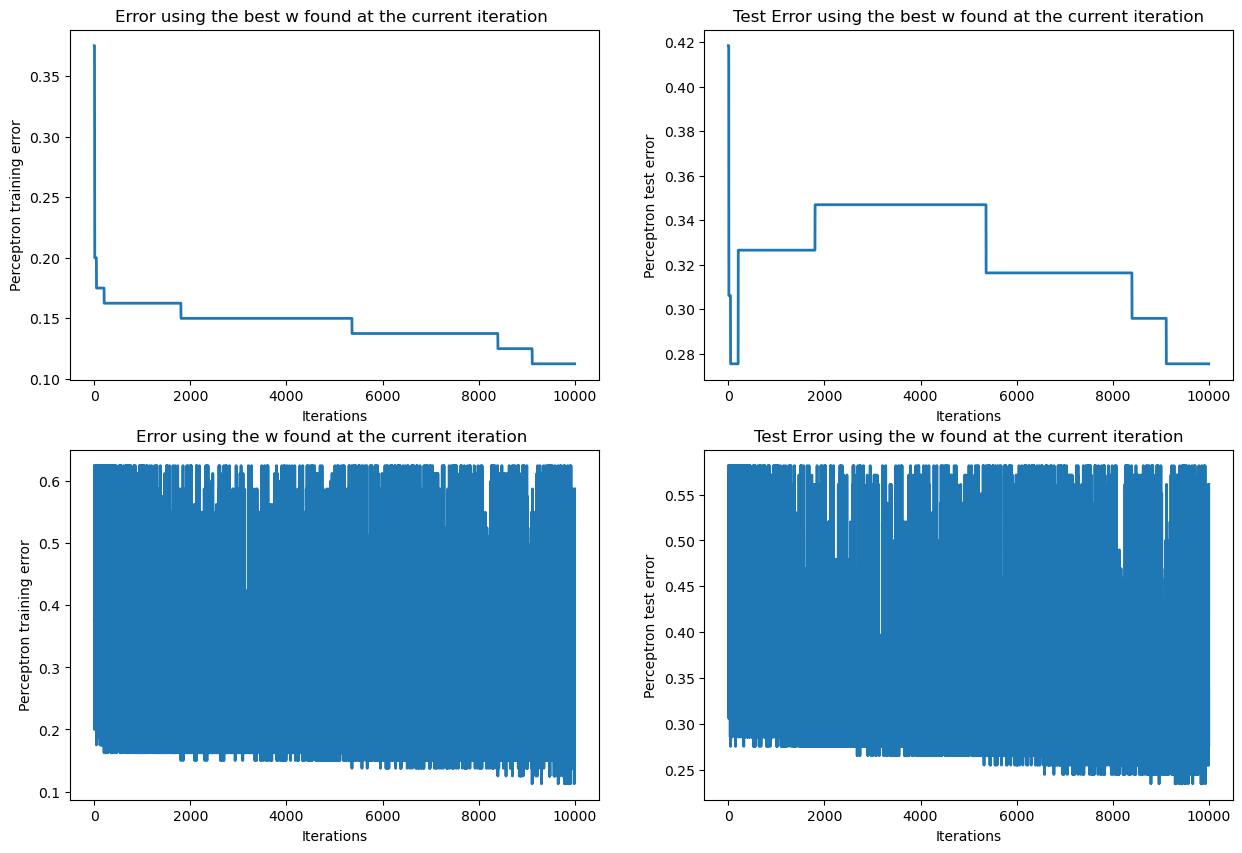

In [18]:
error_list_testBest = error_models(x_test, y_test, w_listBest)
error_list_test = error_models(x_test, y_test, w_list)
fig, axes = plt.subplots(2,2, figsize=(15,10))
axes[0][0].plot([i for i in range(len(w_listBest))], error_list_trainBest, linewidth=2)
axes[0][0].set_xlabel('Iterations')
axes[0][0].set_ylabel('Perceptron training error')
axes[0][0].set_title('Error using the best w found at the current iteration ')
axes[0][1].plot([i for i in range(len(w_list))], error_list_testBest, linewidth=2)
axes[0][1].set_xlabel('Iterations')
axes[0][1].set_ylabel('Perceptron test error')
axes[0][1].set_title('Test Error using the best w found at the current iteration')
axes[1][0].plot([i for i in range(len(w_list))], error_list_train, linewidth=2)
axes[1][0].set_xlabel('Iterations')
axes[1][0].set_ylabel('Perceptron training error')
axes[1][0].set_title('Error using the w found at the current iteration ')
axes[1][1].plot([i for i in range(len(w_list))], error_list_test, linewidth=2)
axes[1][1].set_xlabel('Iterations')
axes[1][1].set_ylabel('Perceptron test error')
axes[1][1].set_title('Test Error using the w found at the current iteration')


In [19]:
# now run the perceptron for 100000 iterations
w_found2, training_error2, w_listBest2, error_list_trainBest2, w_list2, error_list_train2 = perceptron(x_train, y_train, 100000)
print(f"Training Error for 100000 iterations is {compute_fraction_missclassified(x_train, y_train, w_found2):.4f}")
print(f"Test Error for 100000 iterations is {compute_fraction_missclassified(x_test, y_test, w_found2):.4f}")

Training Error for 100000 iterations is 0.0250
Test Error for 100000 iterations is 0.1224


Text(0.5, 1.0, 'Test Error using the w found at the current iteration')

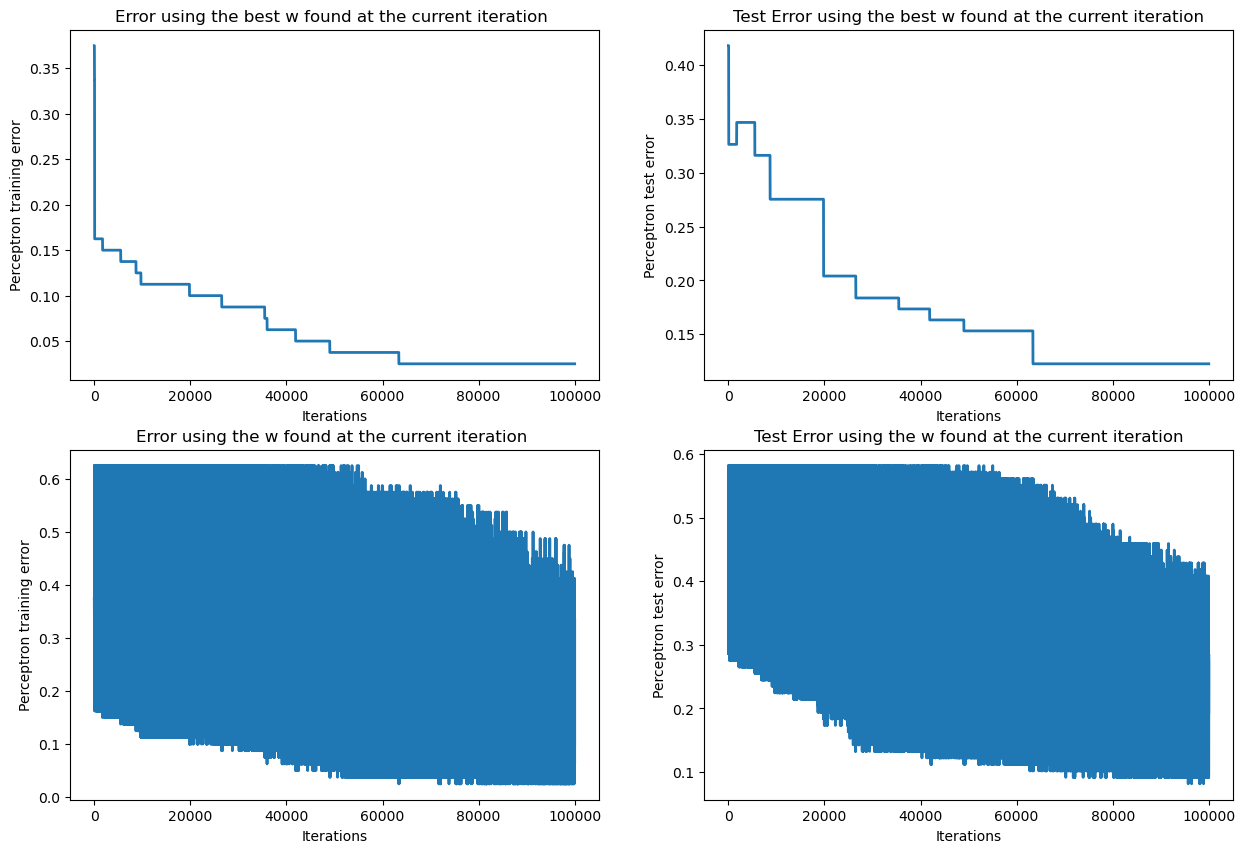

In [20]:
# EXTRA PLOTS BY MEHMET CAN EROGLU
error_list_testBest2 = error_models(x_test, y_test, w_listBest2)
error_list_test2 = error_models(x_test, y_test, w_list2)
fig, axes = plt.subplots(2,2, figsize=(15,10))
axes[0][0].plot([i for i in range(len(w_listBest2))], error_list_trainBest2, linewidth=2)
axes[0][0].set_xlabel('Iterations')
axes[0][0].set_ylabel('Perceptron training error')
axes[0][0].set_title('Error using the best w found at the current iteration ')
axes[0][1].plot([i for i in range(len(w_list2))], error_list_testBest2, linewidth=2)
axes[0][1].set_xlabel('Iterations')
axes[0][1].set_ylabel('Perceptron test error')
axes[0][1].set_title('Test Error using the best w found at the current iteration')
axes[1][0].plot([i for i in range(len(w_list2))], error_list_train2, linewidth=2)
axes[1][0].set_xlabel('Iterations')
axes[1][0].set_ylabel('Perceptron training error')
axes[1][0].set_title('Error using the w found at the current iteration ')
axes[1][1].plot([i for i in range(len(w_list2))], error_list_test2, linewidth=2)
axes[1][1].set_xlabel('Iterations')
axes[1][1].set_ylabel('Perceptron test error')
axes[1][1].set_title('Test Error using the w found at the current iteration')

**TO DO 5**: Answer in the next cell:

Consider the plots above. How do the errors compare? Can you identify a some particular property? 

ANSWER:

There are 4 different types of the error behaviour considering the plots above.

As training continues, better best_w candidates are found continuously (for training). When there is a sufficient number of iterations, improvement in test error can be also observed (in the extra plots with higher iteration numbers, this can be seen as well). These also verify our assumption about linear separability !

Errors (for training and test) may change in different boundaries for each iteration, however, both upper and lower boundaries decrease, and get close to zero as number of iterations increases.

# Logistic Regression
Now we use logistic regression, as implemented in Scikit-learn, to predict labels. We first do it for 2 labels and then for 3 labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [21]:
import random
# Let's reinitialize the random seed 
random.seed(1)
np.random.seed(1)

# In the following we will keep the dataset with only two classes (which we aggregated before)
m_t = 80
x_train, y_train, x_test, y_test = create_train_val_test_datasets_with_constraints(X, Y, m_t, len(Y)-m_t, 25)
print('Dataset with constraints successfully created')

Dataset with constraints successfully created


To define a logistic regression model in Scikit-learn use the instruction

`linear_model.LogisticRegression(C=1e5, max_iter=?)`

`C` is the inverse of the regularization strength. We well see more about regularization later in the course. Setting `C` to a high value is almost as ignoring regularization, so the instruction above corresponds to the logistic regression you have seen in class. Choose the proper number of iterations: max_iter.

To learn the model you need to use the `fit(...)` instruction and to predict you need to use the `predict(...)` function. See the Scikit-learn documentation for how to use it (have a look at the logreg.score method too).

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples missclassified in the training set and in the test set.

In [22]:
# TODO 6
# Logistic regression for 2 classes
# To compute the error rate (classification loss you can use the function "classification_loss" you built before)
max_iter = 1000

logreg = linear_model.LogisticRegression(C=1e5, max_iter=max_iter)
logreg.fit(x_train, y_train)

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

error_rate_training = classification_loss(y_train, y_train_pred)
error_rate_test = classification_loss(y_test, y_test_pred)
error_rate_test_sklearn = 1 - logreg.score(x_test, y_test)
    
print("Error rate on training set: "+str(error_rate_training))
print("Error rate on test set: "+str(error_rate_test))
print(f"Compare the estimate of generalization with the sklearn implementation {error_rate_test_sklearn}")

Error rate on training set: 0.0
Error rate on test set: 0.09183673469387756
Compare the estimate of generalization with the sklearn implementation 0.09183673469387754


In [23]:
assert np.isclose(error_rate_test, error_rate_test_sklearn)

**TO DO 7**: Answer in the next cell:

- If you get a zero training error using the logistic regression, what can you say about data separability?

- In such case, would the perceptron be able to stop even without a number of maximum iterations? If yes, can we find an upperbound for the number of iterations required by the perceptron in order to stop?

ANSWER:

* Logistic regression is a probabilistic model which is related to the distance between data points and hyperplane. Zero training error means training dataset is linearly separable (separable by a hyperplane). 

* For linearly separable datasets, the perceptron can reach zero training error in finite iterations. For example, after 10.000 iterations, training error gets 0.1125 and after 100.000 iterations, training error gets 0.025. It decreases, and the extra plots which I have created above displays convergence of error curve. Theoretically, (B*M)^2 is upper boundary for number of iterations required for zero training error.

$$ K <= B^2.M^2 $$
where
$$ B = \max{||x_i||} $$
$$ M = \inf{||\omega||} $$
such that $$ y_i.\omega^T.x_i >= 1 $$

**TO DO 8**:

Consider the perceptron algorithm and allow it to run for an unlimited number of iterations. Complete the following function `bound_K_perceptron()`:

Input:
- a data matrix $X \in \mathbb{R}^{m \times d}$
- the response vector $Y\in \mathbb{R}^m$
- the extended coefficient vector $w \in \mathbb{R}^{d+1}$ (whose first element is the intercept) of the linear model

Output: 
- an upper bound $K$ on the number of iterations needed by the perceptron to stop. If the input data does not allow to obtain such bound, return $K=-1$.

In [24]:
# This function is created considering MISTAKE BOUND THEOREM (Novikoff-Block 1962)

def bound_K_perceptron(x_train : np.ndarray, y_train : np.ndarray, w : np.ndarray):
    """
    :param x_train: training data, each row is a data sample (m \times d)
    :param y_train: vector of labels
    :param w: model coefficients, the first element is the intercept
    
    :return: A scalar K that bounds the number of iterations needed by the perceptron to stop.
             If w does not allow to compute the bound, return K = -1
    """
        
    x_train_extended = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
    B = np.linalg.norm(x_train_extended, axis=1).max()
    gamma = np.min(y_train * np.dot(x_train_extended, w)) / np.linalg.norm(w[1:])

    if (w.shape[0] != x_train.shape[1] + 1) or (gamma == 0):
        B = -1
        
    else:
        # Compute the bound K
        K = B**2 / gamma**2
    
    return K

In [25]:
# check what happens using the model found by the logistic regression
w_logreg = np.concatenate((logreg.intercept_, np.ndarray.flatten(logreg.coef_)))
K = bound_K_perceptron(x_train, y_train, w_logreg)
print('K =', K)


K = 47136341.749169275


Now we do logistic regression for classification with 3 classes.

In [26]:
random.seed(ID_number)
np.random.seed(ID_number)

X = wine.data
Y = wine.target

m_t = 80
x_train, y_train, x_test, y_test = create_train_val_test_datasets_with_constraints(X, Y, m_t, len(Y)-m_t, 20)
print('Dataset with constraints successfully created')

_, counts = np.unique(y_train, return_counts=True)
assert (counts >= 20).all()
_, counts = np.unique(y_test, return_counts=True)
assert (counts >= 20).all()

Dataset with constraints successfully created


In [27]:
# TODO 9
# Logistic regression for 3 classes
# To compute the error rate (classification loss you can use the function "classification_loss" you built before)
# Choose the proper number of iterations: max_iter.
max_iter = 1000

logreg = linear_model.LogisticRegression(C=1e5, max_iter=max_iter)
logreg.fit(x_train, y_train)

y_train_pred = logreg.predict(x_train)
y_test_pred = logreg.predict(x_test)

error_rate_training = classification_loss(y_train, y_train_pred)
error_rate_test = classification_loss(y_test, y_test_pred)
error_rate_test_sklearn = 1 - logreg.score(x_test, y_test)
    
print("Error rate on training set: "+str(error_rate_training))
print("Error rate on test set: "+str(error_rate_test))
print(f"Compare the estimate of generalization with the sklearn implementation {error_rate_test_sklearn}")

Error rate on training set: 0.0
Error rate on test set: 0.17346938775510204
Compare the estimate of generalization with the sklearn implementation 0.173469387755102


In [28]:
assert np.isclose(error_rate_test, error_rate_test_sklearn)

We now are going to plot prediction boundaries of a logistic regression model, in order to plot them we need to reduce the number of features to 2: pick two features and restrict the dataset to include only two features, whose indices are specified in the `features` vector below. Then split into training and test.

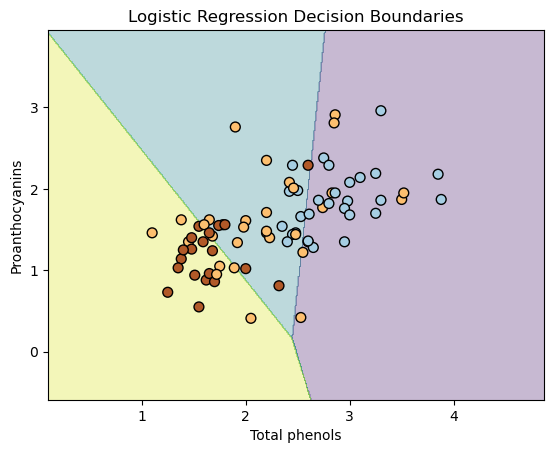

In [29]:
# TODO 10
#to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                 'Proline']
labels_list = ['class_0', 'class_1', 'class_2']

index_feature1 = 5  
index_feature2 = 8  # I randomly selected 5 and 8
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X = X[:,features]

# In the following we will keep the dataset with 3 classes
m_t = 80
x_train, y_train, x_test, y_test = create_train_val_test_datasets_with_constraints(X, Y, m_t, len(Y)-m_t, 20)

# Fit a logistic regression model on the reduced set of features
logreg = linear_model.LogisticRegression(C=1e5, max_iter=1000)
logreg.fit(x_train, y_train)

# Plot the decision boundaries
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', marker='o', s=50, linewidth=1, cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)
plt.title("Logistic Regression Decision Boundaries")
plt.show()

In [30]:
assert logreg.predict(x_test).shape == (x_test.shape[0], )

The code below uses the model in `logreg` to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

Text(0.5, 1.0, 'Test set')

<Figure size 400x300 with 0 Axes>

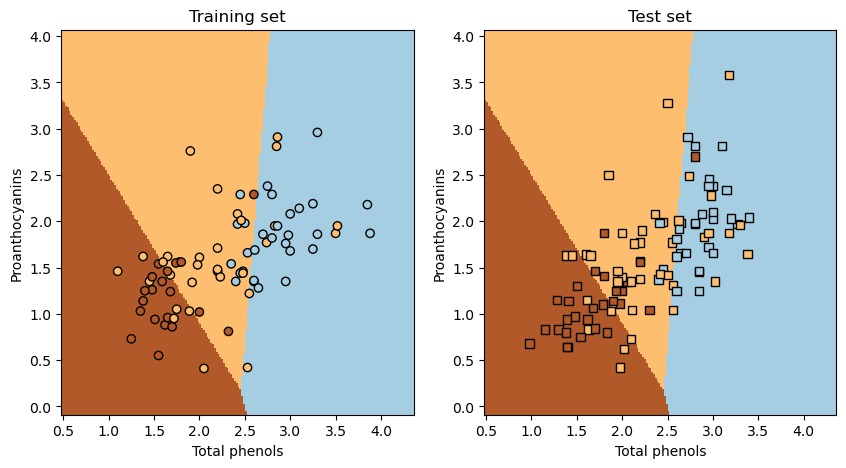

In [31]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].pcolormesh(xx, yy, Z[:-1,:-1], cmap=plt.cm.Paired)

# Plot also the training points
axes[0].scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
axes[0].set_xlabel(feature_name0)
axes[0].set_ylabel(feature_name1)

axes[0].set_xlim(xx.min(), xx.max())
axes[0].set_ylim(yy.min(), yy.max())
axes[0].set_title('Training set')

# Put the result into a color plot
Z = Z.reshape(xx.shape)
axes[1].pcolormesh(xx, yy, Z[:-1,:-1], cmap=plt.cm.Paired)

# Plot also the test points 
axes[1].scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
axes[1].set_xlabel(feature_name0)
axes[1].set_ylabel(feature_name1)

axes[1].set_xlim(xx.min(), xx.max())
axes[1].set_ylim(yy.min(), yy.max())
axes[1].set_title('Test set')

**TO DO 11**: Answer in the next cell (you do not need more than 5-7 lines):

- What is the shape of the decision boundaries in the higher dimensional space ($\mathbb{R}^d$)? Why?

- In this lower dimensional space, are the features linearily separable? What if you consider the entire feature vector (without any dimensionality reduction)?  


ANSWER:

* In R^1 space, boundaries are points; in R^2 space, boundaries are lines (or segmens); in R^3 space, boundaries are planes; in R^d space, boundaries are hyperplanes with (d-1) dimension.

* Using 2 features to create a (reduced) feature map, we may not obtain a linearly separable space. I used 5 and 8th features, and the resultant feature space isn't linearly separable. Because reduction of spaces causes information loss, 2 very distinct points from different classes may be projected into the same point or region of points with identical classes.